**Import dependancies**

In [56]:
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, metrics
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import numpy

**Import the dataset**

In [57]:
dataSet = pandas.read_csv("z-AssignmentTrainingData100-JamieComplex.csv")
#print(dataSet)

**Convert non-numerical fields to numerical values**

In [58]:
convert = {True: 1, False: 0}
dataSet['SuccessTF'] = dataSet['SuccessTF'].map(convert)
#print(dataSet)

**Divide the data into features (Attributes), and output (labels)**

In [59]:
features = ['OvertakingSpeedMPS', 'OncomingSpeedMPS', 'InitialSeparationM']
input = dataSet[features]
output = dataSet['SuccessTF']
#print(input)
#print(output)

**SKLEARN has the ability to automtically split dataset into training and testing data**

In [60]:
from sklearn.model_selection import train_test_split
input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.2, random_state=0)

**Now create the tree and train the model**

In [61]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(input_train, output_train)

**Now plot the tree into readable form.**
    <br> > The top label shows what feature it is splitting on, and the value it is splitting at
    <br> > The second label is the entropy value, 0.0 = all items got the same result, 0.5 = items were split 50/50
    <br> > The third label is the total number of items being looked at
    <br> > The bottom label is the result of the split, number of items that went each side

[Text(0.515625, 0.9285714285714286, 'OncomingSpeedMPS <= 24.95\ngini = 0.485\nsamples = 80\nvalue = [33, 47]'),
 Text(0.3125, 0.7857142857142857, 'InitialSeparationM <= 189.05\ngini = 0.26\nsamples = 39\nvalue = [6, 33]'),
 Text(0.25, 0.6428571428571429, 'OvertakingSpeedMPS <= 25.4\ngini = 0.49\nsamples = 14\nvalue = [6, 8]'),
 Text(0.1875, 0.5, 'InitialSeparationM <= 184.25\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.125, 0.35714285714285715, 'OncomingSpeedMPS <= 19.75\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.0625, 0.21428571428571427, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.1875, 0.21428571428571427, 'InitialSeparationM <= 168.95\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.125, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.25, 0.07142857142857142, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.25, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3125, 0.5, 'gini = 0.0\nsamples = 3\nv

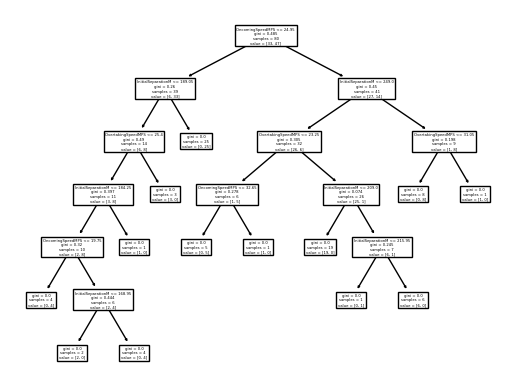

In [62]:
tree.plot_tree(dtree, feature_names=features)

**Use the model to test predict new things**

**Round the result in case its not a whole number before convert to normal text**
<br>`def` is short for definition - it is the python way of defining a method/function

In [63]:
outcome = dtree.predict(input_test)

def round_half_up(n, decimals=0):
    multiplier = 10 ** decimals
    return numpy.floor(n*multiplier + 0.5) / multiplier

outcome = round_half_up(outcome, decimals=0)

print('Predicted Output: ', outcome)
print('Expected Output:  ', output_test.to_numpy())

Predicted Output:  [1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1.]
Expected Output:   [1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1]


**Evaluate how good the algorithm is:**
<br>You can use different metrics to evaluate an algorithm:
- mean absolute error (expect to be within 10% of range of values)
- root mean squared error (expect to be within 10% of average)
- F1 score (the closer to 1 is better, expect within 10%) (Sharma, 2020)

Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0
F1 Score: 1.0
Accuracy Percentage:  100.0 %


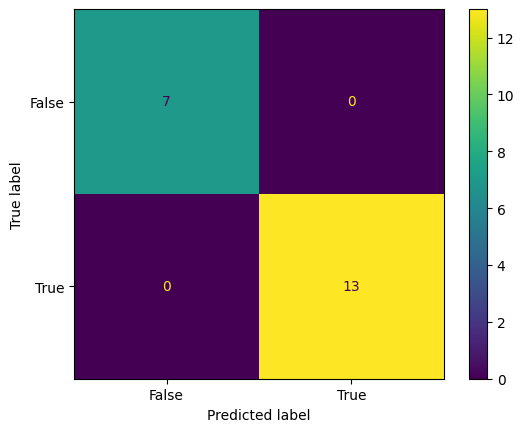

In [64]:
mae = metrics.mean_absolute_error(output_test, outcome)
print('Mean Absolute Error:', mae)
maeCheck = (max(output_test)-min(output_test))*0.1
if mae > maeCheck:
    print('\033[91m'+'MAE indicates your algorithm needs improving'+'\033[0m')

evalValue = numpy.sqrt(metrics.mean_squared_error(output_test, outcome))
print('Root Mean Squared Error:', evalValue)
avgOutput = numpy.average(output)
if evalValue > avgOutput*0.1:
    print('\033[91m'+'RSME indicates your algorithm needs improving'+'\033[0m')

f1 = metrics.f1_score(output_test, outcome)
print('F1 Score:', f1)
f1Check = 0.9
if f1 < f1Check:
    print('\033[91m'+'F1 Score indicates your algorithm needs improving'+'\033[0m')

print("Accuracy Percentage: ", 100*(accuracy_score(output_test, outcome)),"%")

confusion_matrix = metrics.confusion_matrix(output_test, outcome)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

**Now finally use the model to predict an actual result**
<br>Set your prediction data, you can do it manually or use a dataframe to avoid user warnings

In [65]:
predictData = pandas.DataFrame(columns=features, index=[0])
predictData.loc[0] = pandas.Series({'OvertakingSpeedMPS': 22.8, 'OncomingSpeedMPS': 31.3, 'InitialSeparationM': 263.7})

outcome = dtree.predict(predictData)
outcome = round_half_up(outcome, decimals=0)
print(outcome)

[1.]


**Now convert to text and give an output**

In [66]:
if outcome == 0:
    print('\033[91m'+'\033[1m'+'I recommend you DO NOT overtake.'+'\033[0m')
elif outcome == 1:
    print('\033[92m'+'\033[1m'+'You can safely overtake.'+'\033[0m')
else:
    print('\033[96m'+'\033[1m'+'The outcome is unknown. Proceed at your own risk.'+'\033[0m')

You can safely overtake.
